In [1]:
import spotpy 
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from setup import SIRB_Setup, Results, ResultsDept
from sirb import SIRB
from misc import *
import pandas as pd

In [2]:
model_str = 'norm'

In [3]:
setup = SIRB_Setup().model_dept()
setup.t1i = datetime.date(2010, 10, 24)
setup.t2f = datetime.date(2016, 10, 25) 
setup.t1f = setup.t2f # force until the end


model = SIRB(setup, model_str)
r = model.run().y

>>> End of simulation:  1.0290000438690186


In [4]:
result = ResultsDept(r, setup)

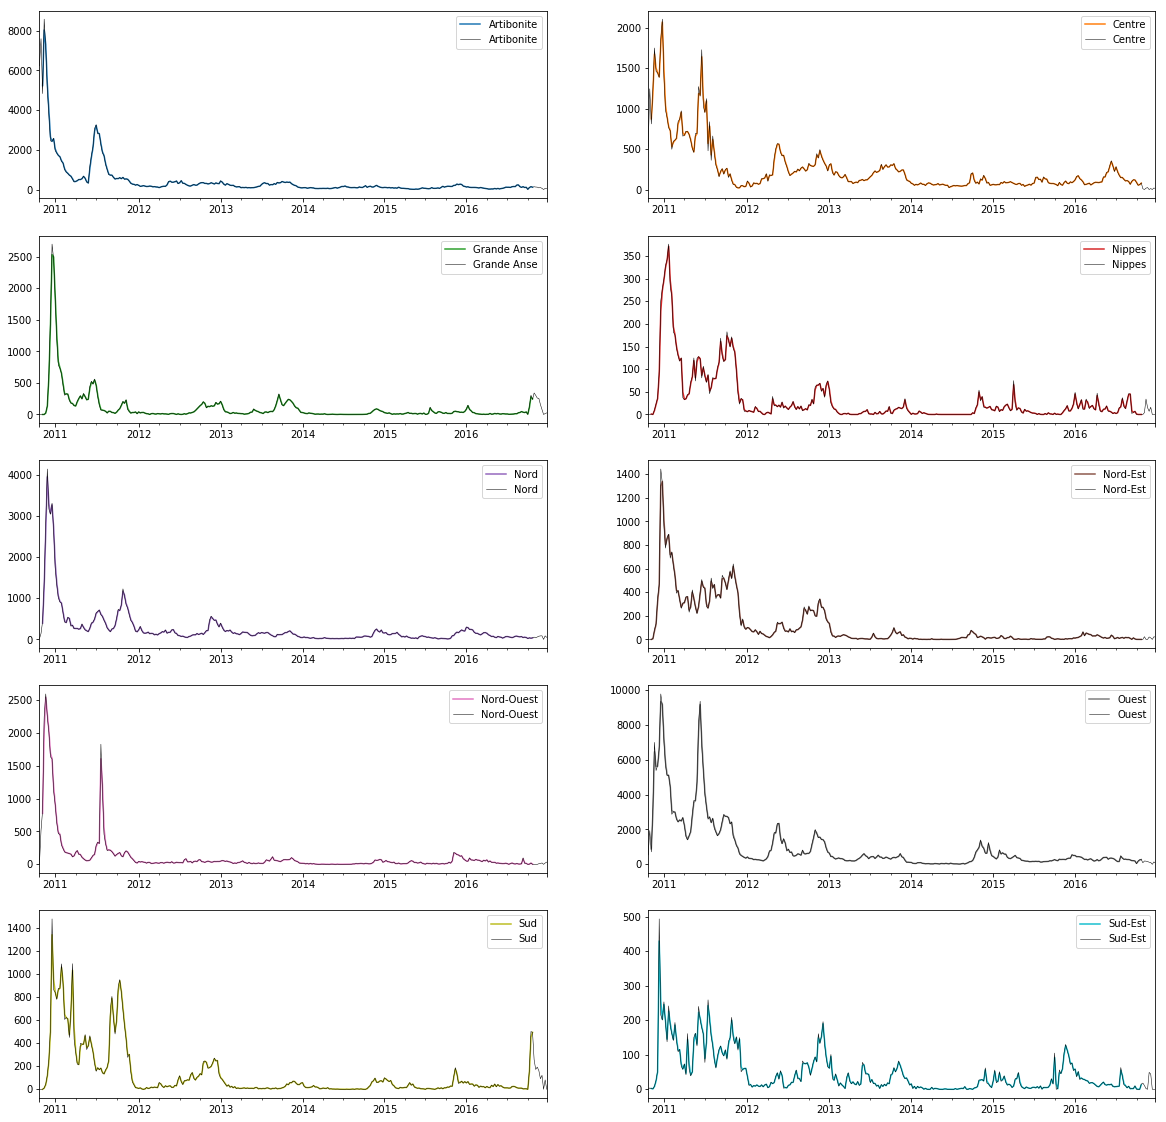

In [6]:
fig, axes = plt.subplots(5, 2, figsize=(20,20), squeeze = True);
axes = axes.flatten()

result.I_adm1_w.plot(subplots=True, ax=axes)
setup.cases.plot(subplots=True, style='k', ax=axes,linewidth=0.5);

In [11]:
def upscale_with_mean(geo, data):
    dept_data = pd.DataFrame(0, index=data.index, columns=geo.adm1_name)
    for ind,dept in enumerate(geo.adm1_name):
        tot_ws = sum(geo.ws_adm1[:,ind])
        for ws in np.nonzero(geo.ws_adm1[:,ind])[0]:
             dept_data.loc[:,dept] += geo.ws_adm1[ws,ind] * data[:][ws]/tot_ws
    return dept_data


def upscale_matrix(geo, data):
    dept_data = 1
    for ind,dept in enumerate(geo.adm1_name):
        tot_ws = sum(geo.ws_adm1[:,ind])
        for ws in np.nonzero(geo.ws_adm1[:,ind])[0]:
             dept_data.loc[:,dept] += geo.ws_adm1[ws,ind] * data[:][ws]/tot_ws
    return dept_data

#np.sum(setup.fluxes, axis=1)


In [83]:
dept_data = np.zeros(10)


#dept_data[1,2] = 7

#(setup.geo.ws_adm1.T @ setup.fluxes @ setup.geo.ws_adm1)
dept_data

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [62]:
np.sum(dept_data,axis=1)

array([ 1.,  8.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [70]:
np.mean(np.sum(setup.geo.ws_adm1, axis=0))

36.500000000000007

In [84]:
a = setup.geo.ws_adm1.T @ setup.fluxes @ setup.geo.ws_adm1
np.fill_diagonal(a,0)
row_sums = a.sum(axis=1)
new_matrix = a / row_sums[:, np.newaxis]
np.sum(new_matrix, axis=1)
new_matrix

array([[ 0.        ,  0.11751293,  0.00042947,  0.0041336 ,  0.26549491,
         0.05398963,  0.1854495 ,  0.35358433,  0.00340802,  0.01599761],
       [ 0.20865496,  0.        ,  0.00064378,  0.00619628,  0.13367234,
         0.05870871,  0.02296908,  0.53822721,  0.00510864,  0.02581899],
       [ 0.0092908 ,  0.00727645,  0.        ,  0.12244897,  0.00197631,
         0.00078276,  0.00068821,  0.18939526,  0.63127175,  0.0368695 ],
       [ 0.0265019 ,  0.02075598,  0.06120071,  0.        ,  0.0056374 ,
         0.0022328 ,  0.00196311,  0.53380892,  0.2612534 ,  0.08664578],
       [ 0.40015165,  0.13190779,  0.00021251,  0.0020454 ,  0.        ,
         0.1456075 ,  0.12965245,  0.18025991,  0.00168637,  0.00847642],
       [ 0.21435601,  0.14989773,  0.00021289,  0.00204899,  0.39830418,
         0.        ,  0.04542596,  0.17948495,  0.00168933,  0.00857995],
       [ 0.54441198,  0.04925937,  0.00016255,  0.00156449,  0.23111324,
         0.03266174,  0.        ,  0.1335599 

In [7]:
import scipy.io as sio
rainfall_raw = sio.loadmat('data/weather/prec_TRMM_GPM_daily_ws.mat')        
rainfall = timeseries_mat2py(rainfall_raw['R_WS_day'], rainfall_raw['date_list'], np.arange(365)).fillna(0) 

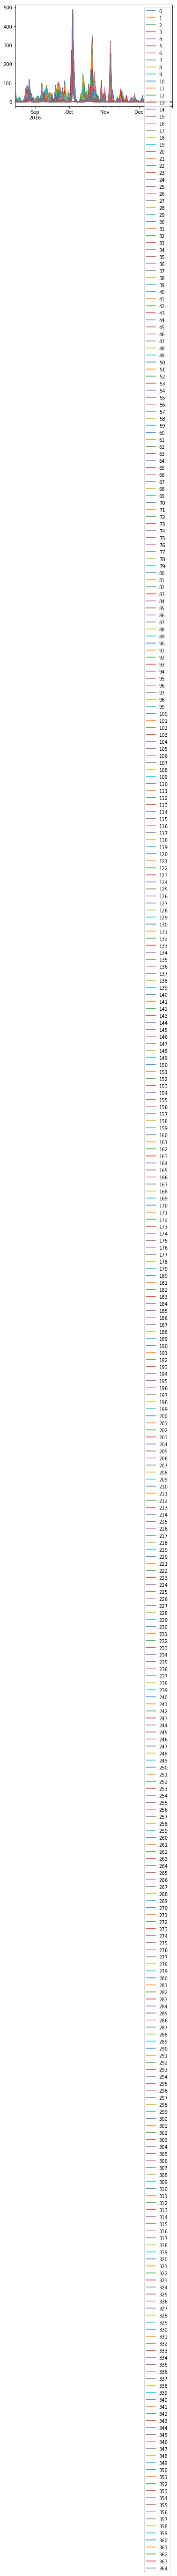

In [10]:
t1i = datetime.date(2016, 8, 15) 
t2f = datetime.date(2016, 12, 30)
rainfall[t1i:t2f].plot()